**To generate a barcode graph as seen in the paper**


If you just want to plot the Skandiver results, you can use the following command:

```
python3 make_area_graph.py <path_to_skandiver.txt_ouput>
```
If you want to compare between Mefinder, geNomad, and Skandiver, do the following:
1. First, extract coordinates from skandiver results using the following command, which outputs a .csv file with genome_id,start,end:
```
python3 get_skani_locations.py skandiver_results.txt
```
2. Extract Mefinder data using the following command, which outputs a .csv file with contig,start,end:

```
python3 extract_start_end.py mefinder_results.csv output_file.csv
```
3. To extract genomad data, run the following program:

```
python3 get_genomad_coor.py <plasmid genes.tsv file> <virus genes.tsv file> <output file name .csv>
```
mefinder__locations.csv




Then, run the following program, changing the contig id depending on which one you want to graph. If you don't have data for one of the softwares, set that variable to None.

In [ ]:
plot_graph(<contig_id>, <skandiver_coor.csv>, <mefinder_coor.csv>, <genomad_coor.csv>)

In [ ]:
#@title get_coordinates function

import csv

def get_coordinates(genome_id, csv_file):
    coordinates = []

    with open(csv_file, 'r') as infile:
        reader = csv.reader(infile)
        next(reader)  # Skip the header row

        for row in reader:
            if row[0] == genome_id:
                start, end = int(row[1]), int(row[2])  # Convert to integers if needed
                coordinates.append((start, end))

    return coordinates

# Example usage
#genome_id = 'CP129688.1'  # Replace with the desired GenomeID/AccessionNumber
#csv_file = 'genome_positions_comparison_skani_highD_results.txt.csv'  # Replace with the path to your .csv file

#genome_coordinates = get_coordinates(genome_id, csv_file)
#print(genome_coordinates)


In [ ]:
#@title plot_graph function

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_graph(contig_id, skandiver, mefinder, genomad):
    skani_color =  (254/255, 17/255, 17/255)
    genomad_color =  (1/255, 207/255, 13/255)
    mefinder_color =  (1/255, 40/255, 218/255)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(9, 0.5))

    max_s = 0
    max_m = 0
    max_g = 0

    if skandiver:
        skani_data = get_coordinates(contig_id, skandiver)
        print("skani extracted")

        for start1, end1 in skani_data:
            if end1 > max_s:
                max_s = end1
            rect1 = patches.Rectangle((start1, 0), end1 - start1, 1, linewidth=1, edgecolor= skani_color, facecolor=skani_color, alpha=0.5)
            ax.add_patch(rect1)

    if mefinder:
        mefinder_data = get_coordinates(contig_id, mefinder)
        print("mefinder extracted")

        for start2, end2 in mefinder_data:
            if end2 > max_m:
                max_m = end2
            rect2 = patches.Rectangle((start2, 0), end2 - start2, 1, linewidth=1, edgecolor= mefinder_color, facecolor= mefinder_color, alpha=0.5)
            ax.add_patch(rect2)

    if genomad:
        genomad_data = get_coordinates(contig_id, genomad)
        print("genomad extracted")

        for start3, end3 in genomad_data:
            if end3 > max_g:
                max_g = end3
            rect3 = patches.Rectangle((start3, 0), end3 - start3, 1, linewidth=1, edgecolor=genomad_color, facecolor=genomad_color, alpha=0.5)
            ax.add_patch(rect3)

    if not skandiver and not mefinder and not genomad:
        print("No data inputted, please give check the data files of each software.")
        return 0




    # Hide y-axis
    ax.set_yticks([])
    ax.set_yticklabels([])
    maximum = max([max_s, max_m, max_g])

    if maximum == 0:
        print("No hits were found for this plasmid")
        return 0

    # Add labels
    ax.set_xticks(range(0,  maximum, maximum//10))
    ax.set_xlabel('Genomic Position')

    ax.legend(handles=[patches.Patch(color=skani_color, label='skandiver high density'),
                    patches.Patch(color=mefinder_color, label='mefinder'),
                    patches.Patch(color=genomad_color, label='genomad')],
            bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(f'{contig_id} Overlap of Softwares')

    plt.show()
    # or save the plot
    # plt.savefig('genomic_overlap_plot.png')

In [ ]:
#@title practice run with everything
pwd: /usr1/gouallin/mobile_ctrl/plasmids

Skani:
all_plasmid_normD_results.txt
python3 /usr1/shared/get_skani_locations.py all_plasmid_normD_results.txt
output: genome_positions_all_plasmid_normD_results.txt.csv

Genomad:
pwd: /usr1/gouallin/mobile_ctrl/plasmids/genomad_all_plasmids_results/all_plasmids_with_names_summary/
- all_plasmids_with_names_virus_genes.tsv
- all_plasmids_with_names_plasmid_genes.tsv

python3 /usr1/shared/get_genomad_coor.py all_plasmids_with_names_virus_genes.tsv all_plasmids_with_names_plasmid_genes.tsv genomad_plasmid_coor.csv
output: genomad_plasmid_coor.csv

Mefinder
mefinder_all_plasmids_output.csv

python3 /usr1/shared/extract_start_end.py mefinder_all_plasmids_output.csv

mefinder__locations.csv

Use to test:
NC_004851.1

skani extracted
mefinder extracted
genomad extracted


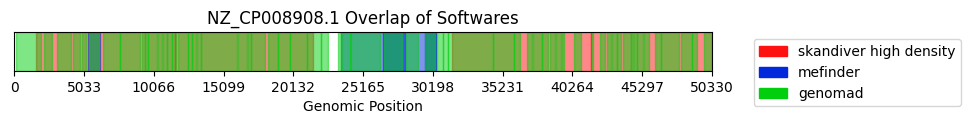

In [ ]:
plot_graph("NZ_CP008908.1", "genome_positions_all_plasmid_normD_results.txt.csv", "mefinder__locations.csv", "genomad_plasmid_coor.csv")

skani extracted
mefinder extracted
genomad extracted


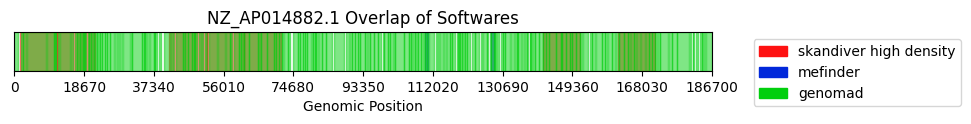

In [ ]:
plot_graph("NZ_AP014882.1", "genome_positions_all_plasmid_normD_results.txt.csv", "mefinder__locations.csv", "genomad_plasmid_coor.csv")

skani extracted
mefinder extracted
genomad extracted


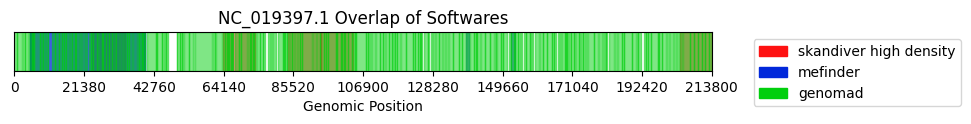

In [ ]:
plot_graph("NC_019397.1", "genome_positions_all_plasmid_normD_results.txt.csv", "mefinder__locations.csv", "genomad_plasmid_coor.csv")

In [ ]:
#@title get list of plasmids that all softwares found
import csv

def get_set(csv_file):
    gene_set = set()

    with open(csv_file, 'r') as infile:
        reader = csv.reader(infile)
        next(reader)  # Skip the header row

        for row in reader:
            gene_set.add(row[0])

    return gene_set

# Example usage
#genome_id = 'CP129688.1'  # Replace with the desired GenomeID/AccessionNumber
#csv_file = 'genome_positions_comparison_skani_highD_results.txt.csv'  # Replace with the path to your .csv file

#genome_coordinates = get_coordinates(genome_id, csv_file)
#print(genome_coordinates)


genomad_set = get_set("genomad_plasmid_coor.csv")
mefinder_set = get_set("mefinder__locations.csv")
skani_set = get_set("genome_positions_all_plasmid_normD_results.txt.csv")

total = genomad_set

total = total.intersection(mefinder_set)
total = total.intersection(skani_set)
for elem in total:
    print(elem)
print(len(genomad_set))
print(len(mefinder_set))
print(len(skani_set))


print(len(total))



NZ_CP014934.1
NZ_CP010233.1
NZ_CP011635.1
NZ_CP011588.1
NZ_CP018989.1
NZ_CP018233.1
NZ_CP014283.1
NZ_CP017850.1
NC_017170.1
NZ_CP009975.1
NZ_CP018992.1
NZ_CP009636.1
NZ_CP012276.1
NZ_CP009317.1
NZ_CP010793.1
NZ_CP019993.1
NZ_CP017930.1
NZ_CP014882.1
NZ_CP018070.1
NZ_CP018832.1
NZ_CP011633.1
NZ_CP015730.1
NZ_CP013579.1
NZ_CP012909.1
NZ_CP020060.1
NZ_CP007616.1
NC_019906.1
NZ_CP018994.1
NC_016586.1
NZ_CP009862.1
NZ_CP013538.1
NZ_CP012703.1
NC_019985.2
NC_022045.1
NZ_CP017056.1
NZ_CP017191.1
NZ_CP009903.1
NZ_CP009336.1
NZ_CP009330.1
NZ_CP015592.1
NZ_CP021187.1
NZ_CP020054.1
NZ_CP019014.1
NZ_CP021185.1
NZ_CP020540.1
NZ_CP017058.1
NZ_CP009112.1
NZ_CP009252.1
NZ_AP014706.1
NC_020553.1
NZ_CP014628.1
NZ_CP013069.1
NZ_CP006988.1
NZ_CP006989.1
NZ_CP014668.1
NC_020530.1
NZ_CP011133.1
NC_020822.1
NZ_CP013546.1
NZ_CP008791.1
NZ_CP011634.1
NC_022051.1
NZ_CP013535.1
NZ_CP011649.1
NZ_CP009321.1
NZ_LN614828.1
NZ_CP010898.2
NZ_CP010373.2
NC_021988.1
NZ_CP014932.1
NZ_CP020834.1
NZ_CP011589.1
NZ_CP011583.